In [1]:
import networkx as nx
import matplotlib.pylab as plt
import math
import re

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
coordinations_chinese = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'秦皇岛', geoCoord:[119.6, 39.93]},
{name:'哈密', geoCoord:[93.52, 42.83]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [4]:
city_location={}

In [5]:
for line in coordinations_chinese.split('\n'):
    if line.startswith('//'): continue
    if line.strip() == '': continue
    
    city = re.findall("name:'(\w+)'", line)[0]
    # python re referenes: https://docs.python.org/3/library/re.html
    x_y = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]", line)[0]
    x_y = tuple(map(float, x_y))
    city_location[city] = x_y
    print(city, x_y)

兰州 (103.73, 36.03)
嘉峪关 (98.17, 39.47)
西宁 (101.74, 36.56)
成都 (104.06, 30.67)
石家庄 (114.48, 38.03)
拉萨 (102.73, 25.04)
贵阳 (106.71, 26.57)
武汉 (114.31, 30.52)
郑州 (113.65, 34.76)
济南 (117.0, 36.65)
南京 (118.78, 32.04)
合肥 (117.27, 31.86)
杭州 (120.19, 30.26)
南昌 (115.89, 28.68)
福州 (119.3, 26.08)
广州 (113.23, 23.16)
长沙 (113.0, 28.21)
沈阳 (123.38, 41.8)
长春 (125.35, 43.88)
哈尔滨 (126.63, 45.75)
太原 (112.53, 37.87)
西安 (108.95, 34.27)
北京 (116.46, 39.92)
上海 (121.48, 31.22)
重庆 (106.54, 29.59)
天津 (117.2, 39.13)
呼和浩特 (111.65, 40.82)
南宁 (108.33, 22.84)
银川 (106.27, 38.47)
乌鲁木齐 (87.68, 43.77)
香港 (114.17, 22.28)
秦皇岛 (119.6, 39.93)
哈密 (93.52, 42.83)
澳门 (113.54, 22.19)


In [6]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [7]:
def get_city_distance(city1, city2):
    return geo_distance(city_location[city1], city_location[city2])

In [8]:
get_city_distance('杭州','上海')

153.5185697155768

In [9]:
cities = list(city_location.keys())
cities

['兰州',
 '嘉峪关',
 '西宁',
 '成都',
 '石家庄',
 '拉萨',
 '贵阳',
 '武汉',
 '郑州',
 '济南',
 '南京',
 '合肥',
 '杭州',
 '南昌',
 '福州',
 '广州',
 '长沙',
 '沈阳',
 '长春',
 '哈尔滨',
 '太原',
 '西安',
 '北京',
 '上海',
 '重庆',
 '天津',
 '呼和浩特',
 '南宁',
 '银川',
 '乌鲁木齐',
 '香港',
 '秦皇岛',
 '哈密',
 '澳门']

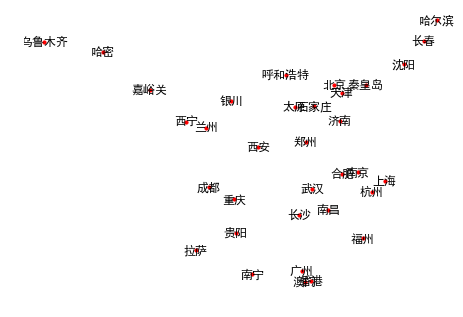

In [10]:
city_graph = nx.Graph()
city_graph.add_nodes_from(cities)
nx.draw(city_graph, city_location, with_labels=True, node_size=10)

In [11]:
from collections import defaultdict
cities_connection = defaultdict(list)
threshold = 700

In [12]:
for c1 in cities:
    for c2 in cities:
        if get_city_distance(c1,c2)<threshold:
            cities_connection[c1].append(c2)            

In [13]:
cities_connection

defaultdict(list,
            {'兰州': ['兰州',
              '嘉峪关',
              '西宁',
              '成都',
              '拉萨',
              '贵阳',
              '西安',
              '重庆',
              '南宁',
              '银川'],
             '嘉峪关': ['兰州', '嘉峪关', '西宁', '成都', '拉萨', '哈密'],
             '西宁': ['兰州', '嘉峪关', '西宁', '成都', '拉萨', '贵阳', '重庆', '银川'],
             '成都': ['兰州',
              '嘉峪关',
              '西宁',
              '成都',
              '拉萨',
              '贵阳',
              '西安',
              '重庆',
              '南宁',
              '银川'],
             '石家庄': ['石家庄',
              '武汉',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '南昌',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特',
              '秦皇岛'],
             '拉萨': ['兰州', '嘉峪关', '西宁', '成都', '拉萨', '贵阳', '重庆', '南宁', '银川'],
             '贵阳': ['兰州', '西宁', '成都', '拉萨', '贵阳',

In [14]:
cities_connection_graph = nx.Graph(cities_connection)

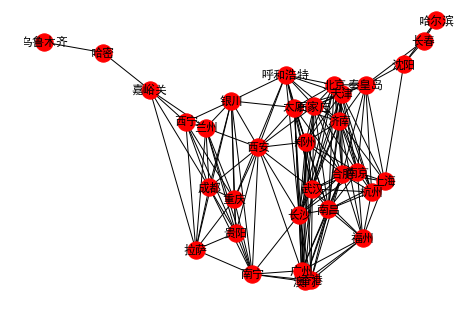

In [18]:
nx.draw(cities_connection_graph,city_location,with_labels=True,size=95)

In [20]:
cities_connection["兰州"]

['兰州', '嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川']

In [93]:
def is_goal(destination):
    def _w(current_path):
        return current_path[-1] == destination
    return _w

In [117]:
def sort_path(cmp_func):
    def _w(pathes):
        return sorted(pathes,key = cmp_func)
    return _w

In [118]:
def get_path_distance(path):
    distance=0
    for i,c in enumerate(path[:-1]):
        distance+=get_city_distance(c,path[i+1])
    return distance

In [119]:
def get_total_station(path):
    return len(path)

In [152]:
def search(connection_graph,start,goal_func,search_startegy):
    pathes = [[start]]
    seen = set()
    while pathes:
        path = pathes.pop(0)    
        froniter = path[-1]
        #print('I am standing at:{}'.format(froniter))
        if froniter in seen:
            continue
        successor = connection_graph[froniter]
        for city in successor:
            if city in path:
                continue                
            new_path = path + [city]
            pathes.append(new_path)
            if goal_func(new_path):
                return new_path
               
                #print(pathes)
        #pathes = sorted(pathes,key=len)
        seen.add(froniter)
        pathes = search_startegy(pathes)
        for p in pathes:
             print('=>'.join(p))
        print('-----------------------')
    return "None"


In [149]:
cities_connection

defaultdict(list,
            {'兰州': ['兰州',
              '嘉峪关',
              '西宁',
              '成都',
              '拉萨',
              '贵阳',
              '西安',
              '重庆',
              '南宁',
              '银川'],
             '嘉峪关': ['兰州', '嘉峪关', '西宁', '成都', '拉萨', '哈密'],
             '西宁': ['兰州', '嘉峪关', '西宁', '成都', '拉萨', '贵阳', '重庆', '银川'],
             '成都': ['兰州',
              '嘉峪关',
              '西宁',
              '成都',
              '拉萨',
              '贵阳',
              '西安',
              '重庆',
              '南宁',
              '银川'],
             '石家庄': ['石家庄',
              '武汉',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '南昌',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特',
              '秦皇岛'],
             '拉萨': ['兰州', '嘉峪关', '西宁', '成都', '拉萨', '贵阳', '重庆', '南宁', '银川'],
             '贵阳': ['兰州', '西宁', '成都', '拉萨', '贵阳',

In [151]:
search(cities_connection,start = '北京',goal_func = is_goal("拉萨"),search_startegy=sort_path(get_path_distance))

北京=>石家庄
北京=>武汉
北京=>郑州
北京=>济南
北京=>南京
北京=>合肥
北京=>杭州
北京=>南昌
北京=>长沙
北京=>太原
北京=>天津
北京=>呼和浩特
北京=>秦皇岛
-----------------------
北京=>武汉
北京=>郑州
北京=>济南
北京=>南京
北京=>合肥
北京=>杭州
北京=>南昌
北京=>长沙
北京=>太原
北京=>天津
北京=>呼和浩特
北京=>秦皇岛
北京=>石家庄=>武汉
北京=>石家庄=>郑州
北京=>石家庄=>济南
北京=>石家庄=>南京
北京=>石家庄=>合肥
北京=>石家庄=>南昌
北京=>石家庄=>广州
北京=>石家庄=>长沙
北京=>石家庄=>太原
北京=>石家庄=>西安
北京=>石家庄=>天津
北京=>石家庄=>呼和浩特
北京=>石家庄=>秦皇岛
-----------------------
北京=>郑州
北京=>济南
北京=>南京
北京=>合肥
北京=>杭州
北京=>南昌
北京=>长沙
北京=>太原
北京=>天津
北京=>呼和浩特
北京=>秦皇岛
北京=>石家庄=>武汉
北京=>石家庄=>郑州
北京=>石家庄=>济南
北京=>石家庄=>南京
北京=>石家庄=>合肥
北京=>石家庄=>南昌
北京=>石家庄=>广州
北京=>石家庄=>长沙
北京=>石家庄=>太原
北京=>石家庄=>西安
北京=>石家庄=>天津
北京=>石家庄=>呼和浩特
北京=>石家庄=>秦皇岛
北京=>武汉=>石家庄
北京=>武汉=>郑州
北京=>武汉=>济南
北京=>武汉=>南京
北京=>武汉=>合肥
北京=>武汉=>杭州
北京=>武汉=>南昌
北京=>武汉=>福州
北京=>武汉=>广州
北京=>武汉=>长沙
北京=>武汉=>太原
北京=>武汉=>西安
北京=>武汉=>天津
北京=>武汉=>呼和浩特
北京=>武汉=>香港
北京=>武汉=>澳门
-----------------------
北京=>济南
北京=>南京
北京=>合肥
北京=>杭州
北京=>南昌
北京=>长沙
北京=>太原
北京=>天津
北京=>呼和浩特
北京=>秦皇岛
北京=>石家庄=>武汉
北京=>石家庄=>郑州
北京=>石家庄=>济南
北京=>石家庄=>南京
北京=>石家庄=>合肥
北京=>石家庄=>南昌
北京=>石家庄=>广州
北京=>石家庄=>长沙


['北京', '长沙', '南宁', '拉萨']

In [153]:
search(cities_connection,start = '北京',goal_func = is_goal("拉萨"),search_startegy=sort_path(get_path_distance))

北京=>天津
北京=>济南
北京=>石家庄
北京=>秦皇岛
北京=>郑州
北京=>合肥
北京=>太原
北京=>南京
北京=>武汉
北京=>呼和浩特
北京=>南昌
北京=>杭州
北京=>长沙
-----------------------
北京=>济南
北京=>天津=>济南
北京=>石家庄
北京=>秦皇岛
北京=>天津=>秦皇岛
北京=>郑州
北京=>天津=>石家庄
北京=>合肥
北京=>太原
北京=>天津=>合肥
北京=>南京
北京=>天津=>南京
北京=>武汉
北京=>呼和浩特
北京=>天津=>郑州
北京=>南昌
北京=>天津=>太原
北京=>天津=>武汉
北京=>天津=>南昌
北京=>杭州
北京=>长沙
北京=>天津=>杭州
北京=>天津=>呼和浩特
北京=>天津=>上海
北京=>天津=>长沙
-----------------------
北京=>天津=>济南
北京=>石家庄
北京=>济南=>天津
北京=>秦皇岛
北京=>天津=>秦皇岛
北京=>郑州
北京=>天津=>石家庄
北京=>合肥
北京=>济南=>合肥
北京=>太原
北京=>天津=>合肥
北京=>济南=>石家庄
北京=>南京
北京=>济南=>南京
北京=>天津=>南京
北京=>武汉
北京=>济南=>秦皇岛
北京=>呼和浩特
北京=>天津=>郑州
北京=>南昌
北京=>济南=>郑州
北京=>济南=>南昌
北京=>济南=>武汉
北京=>天津=>太原
北京=>天津=>武汉
北京=>天津=>南昌
北京=>杭州
北京=>济南=>杭州
北京=>长沙
北京=>天津=>杭州
北京=>济南=>太原
北京=>天津=>呼和浩特
北京=>天津=>上海
北京=>济南=>上海
北京=>济南=>长沙
北京=>济南=>福州
北京=>天津=>长沙
北京=>济南=>呼和浩特
-----------------------
北京=>济南=>天津
北京=>秦皇岛
北京=>天津=>秦皇岛
北京=>郑州
北京=>天津=>石家庄
北京=>石家庄=>郑州
北京=>合肥
北京=>济南=>合肥
北京=>太原
北京=>石家庄=>太原
北京=>天津=>合肥
北京=>济南=>石家庄
北京=>南京
北京=>济南=>南京
北京=>天津=>南京
北京=>武汉
北京=>济南=>秦皇岛
北京=>石家庄=>济南
北京=>呼和浩特
北京=>天津=>郑州
北京=>石家庄=>天

['北京', '呼和浩特', '银川', '拉萨']

In [157]:
search(cities_connection,start = '北京',goal_func = is_goal("拉萨"),search_startegy=sort_path(get_as_far_path))

北京=>长沙
北京=>杭州
北京=>南昌
北京=>呼和浩特
北京=>武汉
北京=>南京
北京=>太原
北京=>合肥
北京=>郑州
北京=>秦皇岛
北京=>石家庄
北京=>济南
北京=>天津
-----------------------
北京=>长沙=>天津
北京=>长沙=>南京
北京=>长沙=>济南
北京=>长沙=>南宁
北京=>长沙=>呼和浩特
北京=>长沙=>西安
北京=>长沙=>合肥
北京=>长沙=>石家庄
北京=>长沙=>太原
北京=>长沙=>南昌
北京=>长沙=>郑州
北京=>长沙=>香港
北京=>长沙=>澳门
北京=>长沙=>广州
北京=>长沙=>武汉
北京=>杭州
北京=>南昌
北京=>呼和浩特
北京=>武汉
北京=>南京
北京=>太原
北京=>合肥
北京=>郑州
北京=>秦皇岛
北京=>石家庄
北京=>济南
北京=>天津
-----------------------
北京=>长沙=>天津=>上海
北京=>长沙=>天津=>呼和浩特
北京=>长沙=>天津=>杭州
北京=>长沙=>天津=>南昌
北京=>长沙=>天津=>武汉
北京=>长沙=>天津=>太原
北京=>长沙=>天津=>郑州
北京=>长沙=>天津=>南京
北京=>长沙=>天津=>合肥
北京=>长沙=>天津=>石家庄
北京=>长沙=>天津=>秦皇岛
北京=>长沙=>天津=>济南
北京=>长沙=>南京
北京=>长沙=>济南
北京=>长沙=>南宁
北京=>长沙=>呼和浩特
北京=>长沙=>西安
北京=>长沙=>合肥
北京=>长沙=>石家庄
北京=>长沙=>太原
北京=>长沙=>南昌
北京=>长沙=>郑州
北京=>长沙=>香港
北京=>长沙=>澳门
北京=>长沙=>广州
北京=>长沙=>武汉
北京=>杭州
北京=>南昌
北京=>呼和浩特
北京=>武汉
北京=>南京
北京=>太原
北京=>合肥
北京=>郑州
北京=>秦皇岛
北京=>石家庄
北京=>济南
北京=>天津
-----------------------
北京=>长沙=>天津=>上海=>沈阳
北京=>长沙=>天津=>上海=>南昌
北京=>长沙=>天津=>上海=>济南
北京=>长沙=>天津=>上海=>秦皇岛
北京=>长沙=>天津=>上海=>合肥
北京=>长沙=>天津=>上海=>福州
北京=>长沙=>天津=>上海=>南京
北京=>长沙=>天津=>上海

['北京',
 '长沙',
 '天津',
 '上海',
 '沈阳',
 '哈尔滨',
 '长春',
 '秦皇岛',
 '石家庄',
 '广州',
 '福州',
 '澳门',
 '太原',
 '银川',
 '拉萨']

In [158]:
search(cities_connection,start = '北京',goal_func = is_goal("拉萨"),search_startegy=sort_path(get_path_distance))

北京=>天津
北京=>济南
北京=>石家庄
北京=>秦皇岛
北京=>郑州
北京=>合肥
北京=>太原
北京=>南京
北京=>武汉
北京=>呼和浩特
北京=>南昌
北京=>杭州
北京=>长沙
-----------------------
北京=>济南
北京=>天津=>济南
北京=>石家庄
北京=>秦皇岛
北京=>天津=>秦皇岛
北京=>郑州
北京=>天津=>石家庄
北京=>合肥
北京=>太原
北京=>天津=>合肥
北京=>南京
北京=>天津=>南京
北京=>武汉
北京=>呼和浩特
北京=>天津=>郑州
北京=>南昌
北京=>天津=>太原
北京=>天津=>武汉
北京=>天津=>南昌
北京=>杭州
北京=>长沙
北京=>天津=>杭州
北京=>天津=>呼和浩特
北京=>天津=>上海
北京=>天津=>长沙
-----------------------
北京=>天津=>济南
北京=>石家庄
北京=>济南=>天津
北京=>秦皇岛
北京=>天津=>秦皇岛
北京=>郑州
北京=>天津=>石家庄
北京=>合肥
北京=>济南=>合肥
北京=>太原
北京=>天津=>合肥
北京=>济南=>石家庄
北京=>南京
北京=>济南=>南京
北京=>天津=>南京
北京=>武汉
北京=>济南=>秦皇岛
北京=>呼和浩特
北京=>天津=>郑州
北京=>南昌
北京=>济南=>郑州
北京=>济南=>南昌
北京=>济南=>武汉
北京=>天津=>太原
北京=>天津=>武汉
北京=>天津=>南昌
北京=>杭州
北京=>济南=>杭州
北京=>长沙
北京=>天津=>杭州
北京=>济南=>太原
北京=>天津=>呼和浩特
北京=>天津=>上海
北京=>济南=>上海
北京=>济南=>长沙
北京=>济南=>福州
北京=>天津=>长沙
北京=>济南=>呼和浩特
-----------------------
北京=>济南=>天津
北京=>秦皇岛
北京=>天津=>秦皇岛
北京=>郑州
北京=>天津=>石家庄
北京=>石家庄=>郑州
北京=>合肥
北京=>济南=>合肥
北京=>太原
北京=>石家庄=>太原
北京=>天津=>合肥
北京=>济南=>石家庄
北京=>南京
北京=>济南=>南京
北京=>天津=>南京
北京=>武汉
北京=>济南=>秦皇岛
北京=>石家庄=>济南
北京=>呼和浩特
北京=>天津=>郑州
北京=>石家庄=>天

['北京', '呼和浩特', '银川', '拉萨']

In [88]:
def get_comprehensive_path(path,p=0.5):
    return get_path_distance(path) + get_total_station(path)

In [124]:
def get_as_much_path(path): 
    return -1 * len(path)

In [156]:
def get_as_far_path(path): 
    return -1 * get_path_distance(path)